Bias refers to error from oversimplified models that fail to capture data patterns, while variance refers to error from overly complex models that capture noise. A good model balances bias and variance to generalize well.

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = {
    "age": np.random.randint(20, 60, 100),
    "experience": np.random.randint(0, 40, 100),
    "salary": np.random.randint(20000, 120000, 100)
}

df = pd.DataFrame(data)
df

,age,experience,salary
0,58,22,62107
1,48,23,106202
2,34,36,71663
3,27,34,35708
4,40,39,111906
...,...,...,...
95,28,21,96213
96,27,10,25895
97,31,15,39738
98,53,32,50746


In [7]:
X=df[["experience"]]
y=df["salary"]

In [14]:
X_np=X.values

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_np)

In [16]:
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred_poly = poly_model.predict(X_test_p)

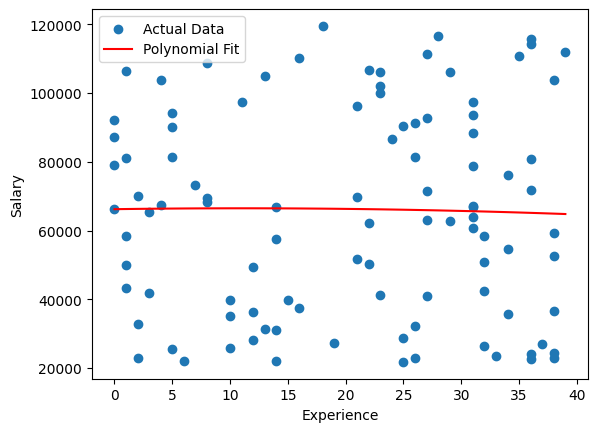

In [21]:
import matplotlib.pyplot as plt
idx=X_np[:, 0].argsort()
X_sorted_idx = X_np[idx]
X_poly_sorted = poly.transform(X_sorted_idx)

y_sorted_pred = poly_model.predict(X_poly_sorted)

plt.scatter(X_np, y, label="Actual Data")
plt.plot(X_sorted_idx, y_sorted_pred, label="Polynomial Fit", color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_np, y)

print("Linear R2:", linear_model.score(X_np, y))
print("Polynomial R2:", poly_model.score(X_poly, y))

Linear R2: 0.00037691493911895524
Polynomial R2: -0.001021943533375369


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

train_r2_linear = linear_model.score(X_train, y_train)
test_r2_linear = linear_model.score(X_test, y_test)

print("Linear Train R²:", train_r2_linear)
print("Linear Test R²:", test_r2_linear)

Linear Train R²: 0.0002098252667400713
Linear Test R²: -0.014940166342022998


In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

train_r2_poly = poly_model.score(X_train_poly, y_train)
test_r2_poly = poly_model.score(X_test_poly, y_test)

print("Polynomial Train R²:", train_r2_poly)
print("Polynomial Test R²:", test_r2_poly)

Polynomial Train R²: 0.0002827161666496547
Polynomial Test R²: -0.014215433089713292


C:\Users\afshe\anaconda3\envs\ai50\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


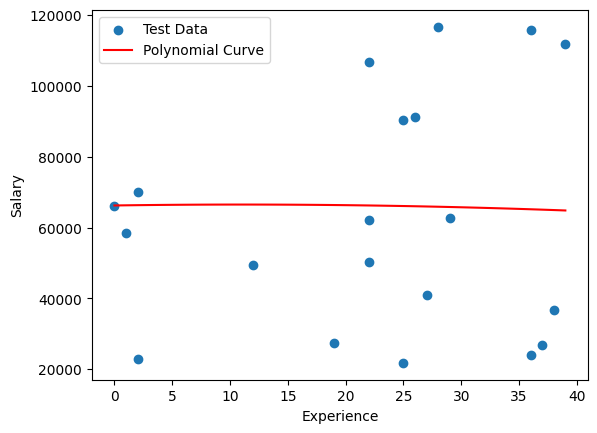

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

y_pred_poly = poly_model.predict(X_range_poly)

plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_range, y_pred_poly, color='red', label="Polynomial Curve")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

In [35]:
#Mean Absolute Error
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

In [36]:
#Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [37]:
#Root Mean Squared Error
rmse_linear = np.sqrt(mse_linear)
rmse_poly = np.sqrt(mse_poly)

In [38]:
print("Linear Regression:")
print("MAE:", mae_linear)
print("RMSE:", rmse_linear)

print("\nPolynomial Regression:")
print("MAE:", mae_poly)
print("RMSE:", rmse_poly)

Linear Regression:
MAE: 27501.325013729278
RMSE: 32269.104715870824

Polynomial Regression:
MAE: 27485.960426505633
RMSE: 32257.581539261075
